In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

/kaggle/input/sa-customer-segmentation/sample.csv
/kaggle/input/sa-customer-segmentation/flight_train.csv
/kaggle/input/sa-customer-segmentation/flight_test.csv
numpy version :  1.19.5
pandas version :  1.2.2
seaborn version :  0.11.1


In [2]:
data_train = pd.read_csv('/kaggle/input/sa-customer-segmentation/flight_train.csv')
print(data_train.shape)
data_train.head(2)

(55000, 23)


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33


In [3]:
data_test = pd.read_csv('/kaggle/input/sa-customer-segmentation/flight_test.csv')
print(data_test.shape)
data_test.head(2)

(7988, 23)


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,27355,9/19/2011,6/2/2012,Male,4,nanjing,jiangsu,CN,29.0,3/31/2014,...,0.0,2005,9/30/2012,549,120.0,120,0,1.000000,2879,6
1,4032,9/18/2012,9/18/2012,Female,4,changchunshi,jilinsheng,CN,43.0,3/31/2014,...,984.0,2301,2/4/2014,57,252.0,477,0,0.871291,1731,0


In [4]:
data = pd.concat([data_train,data_test])
print(data.shape)
data.head()

(62988, 23)


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


#  Data Understanding

In [5]:
print('Total Row',data.shape[0],'Total Feature ',data.shape[1])

Total Row 62988 Total Feature  23


In [6]:
data[data.duplicated()==True]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight


<B> - Data Description</b>


<li>MEMBER_NO-b : Member ID<br>
<li>FFP_DATE : Frequent Flyer Program Join Date<br>
<li>FIRST_FLIGHT_DATE : First flight <br>
<li>GENDER : Gender <br>
<li>FFP_TIER : Tier of Frequent Flyer Program<br>
<li>WORK_CITY : Hometown<br>
<li>WORK_PROVINCE : province of origin<br>
<li>WORK_COUNTRY : country of origin<br>
<li>AGE : Age <br>
<li>LOAD_TIME : ( observation window wnd time ) date data was taken <br>
<li>FLIGHT_COUNT : Number of flights Customer<br>
<li>BP_SUM : Itinerary<br>
<li>SUM_YR_1 : fare revenue 1 (revenue)<br>
<li>SUM_YR_2 : votes price income <br>
<li>SEG_KM_SUM : total distance(km) of flights that have been carried<br>
<li>LAST_FLIGHT_DATE : date of last flight<br>
<li>LAST_TO_END : Time from the last boarding time to the end of the observation window<br>
<li>AVG_INTERVAL : average time interval <br>
<li>MAX_INTERVAL : maximum time interval <br>
<li>EXCHANGE_COUNT : Number of exchanges<br>
<li>avg_discount : average discount obtained<br>
<li>Points_Sum : total points earned by members<br>
<li>Point_NotFlight : points not used by members <br>
<br>
References :<br>
<li>FFP_DATE : FFP-> https://javamilk.com/2014/05/26/menkenal-frequent-flyer-program/
<li>BP_SUM ->

<b>Data Type Check</b>

In [7]:
data.dtypes

MEMBER_NO              int64
FFP_DATE              object
FIRST_FLIGHT_DATE     object
GENDER                object
FFP_TIER               int64
WORK_CITY             object
WORK_PROVINCE         object
WORK_COUNTRY          object
AGE                  float64
LOAD_TIME             object
FLIGHT_COUNT           int64
BP_SUM                 int64
SUM_YR_1             float64
SUM_YR_2             float64
SEG_KM_SUM             int64
LAST_FLIGHT_DATE      object
LAST_TO_END            int64
AVG_INTERVAL         float64
MAX_INTERVAL           int64
EXCHANGE_COUNT         int64
avg_discount         float64
Points_Sum             int64
Point_NotFlight        int64
dtype: object

<b>Data Explore</b>

In [8]:
columns = [x for x in data.columns]
percent=[]
for kolom in columns:
    percent.append(round(data[kolom].isnull().sum()/data[kolom].shape[0]*100, 2))
    
explore = data.describe(percentiles = [], include = 'all').T 
explore['missing'] = len(data) - explore['count'] 
explore['%'] = percent
explore = explore[['missing','%','min','max']]

In [9]:
explore = explore.replace(np.nan, '-', regex=True)
explore

,missing,%,min,max
MEMBER_NO,0.0,0.00,1.0,62988.0
FFP_DATE,0.0,0.00,-,-
FIRST_FLIGHT_DATE,0.0,0.00,-,-
GENDER,3.0,0.00,-,-
FFP_TIER,0.0,0.00,4.0,6.0
WORK_CITY,2269.0,3.60,-,-
WORK_PROVINCE,3248.0,5.16,-,-
WORK_COUNTRY,26.0,0.04,-,-
AGE,420.0,0.67,6.0,110.0
LOAD_TIME,0.0,0.00,-,-


--------------------------------------

# Data Preparation

## EDA

There are too many attributes in the data. To assess customers, the most widely used RFM model <b>(R)</b> current consumption time interval, <b>(F)</b> consumption frequency, <b>(M)</b> total consumption identified.<br>
Judging from the existing features, based on the variety of airline ticket prices, different customers with the same amount of spending on the airline can mean different values. For example, a passenger who purchases a low-class ticket with a longer route is naturally more valuable to the airline than a passenger who buys a high-class ticket with a short route. Therefore, we replace the consumption amount (M) with the flight mileage M-(KM) and the discount coefficient (C), and add the airline relationship duration feature (how long you have been on the airline) LENGTH, which represents the time to join the airline program. . Therefore, we modified the RFM model to be the LRFMC model.

EDA akan berfokus pada fitur RFM

<p><b>L ( Length Relation )</b><br>The length of time the customer has been in contact with the airline company, this value can be obtained from LOAD_TIME ( the time the data was last saved) - ( deducted) FFP_DATE ( the customer is registered in the airline program it</p>
<p><b>R ( Recency )</b><br>
the latest or last time the customer used the airline</p>
<p><b>F ( Frequency )</b><br>
the level of frequency/how many times the customer has used the airline</p>
<p><b>M ( Monetary Value )</b><br>
total distance traveled
<p><b>C ( Coefficient Value )</b><br>
The coefficient of the average discount that customers get

the check missing value found abnormal data, namely in the data in SUM_YR_1 & SUM_YR_2 many were not filled in, which means there is a possibility that the data was not entered correctly, to reduce the risk of bad data and because this data is large, I decided to delete SUM_YR_1 & SUM_YR_2 which has a value the empty one

In [10]:
data = data[data['SUM_YR_1'].notnull()]
data = data[data['SUM_YR_2'].notnull()]

### Recency ( LAST_TO_END )

In [11]:
data['LAST_TO_END'].describe()

count    62299.000000
mean       172.787541
std        181.275570
min          1.000000
25%         29.000000
50%        105.000000
75%        261.000000
max        731.000000
Name: LAST_TO_END, dtype: float64

In [12]:
data['LAST_TO_END'].isnull().value_counts()

False    62299
Name: LAST_TO_END, dtype: int64

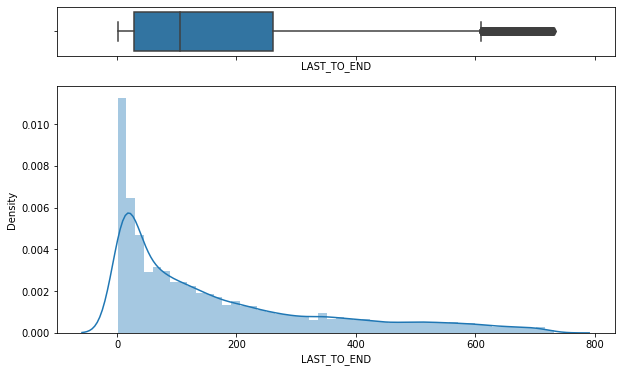

In [13]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))
sns.boxplot(data['LAST_TO_END'], ax=ax_box)
sns.distplot(data['LAST_TO_END'], ax=ax_hist)
plt.show()

### Frequency ( FlIGHT_COUNT )

In [14]:
data['FLIGHT_COUNT'].describe()

count    62299.000000
mean        11.941107
std         14.091654
min          2.000000
25%          3.000000
50%          7.000000
75%         15.000000
max        213.000000
Name: FLIGHT_COUNT, dtype: float64

In [15]:
data['FLIGHT_COUNT'].isnull().value_counts()

False    62299
Name: FLIGHT_COUNT, dtype: int64

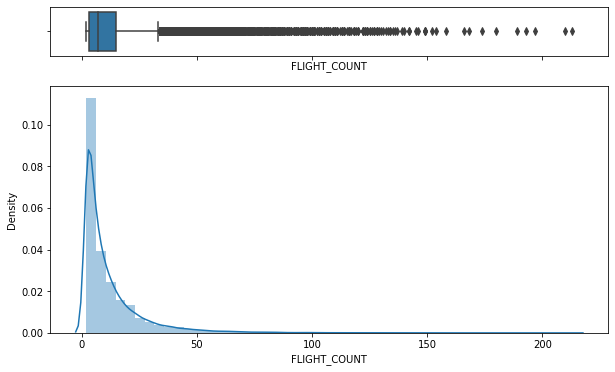

In [16]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))
sns.boxplot(data['FLIGHT_COUNT'], ax=ax_box)
sns.distplot(data['FLIGHT_COUNT'], ax=ax_hist)
plt.show()

### Monetary ( SEG_KM_SUM )

In [17]:
data['SEG_KM_SUM'].describe()

count     62299.000000
mean      17275.697315
std       21024.229954
min         368.000000
25%        4852.000000
50%       10163.000000
75%       21449.000000
max      580717.000000
Name: SEG_KM_SUM, dtype: float64

In [18]:
data['SEG_KM_SUM'].isnull().value_counts()

False    62299
Name: SEG_KM_SUM, dtype: int64

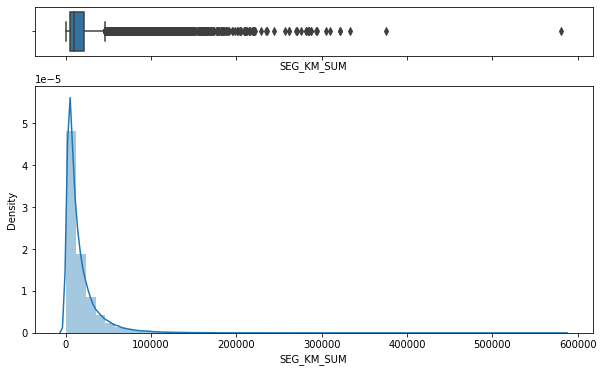

In [19]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))
sns.boxplot(data['SEG_KM_SUM'], ax=ax_box)
sns.distplot(data['SEG_KM_SUM'], ax=ax_hist)
plt.show()

### Length( FFP_DATE - LOAD_TIME )

In [20]:
data[['FFP_DATE','LOAD_TIME']].dtypes

FFP_DATE     object
LOAD_TIME    object
dtype: object

In [21]:
#change data type object to datetime
data['FFP_DATE']=pd.to_datetime(data['FFP_DATE'])
data['LOAD_TIME']=pd.to_datetime(data['LOAD_TIME'])

In [22]:
from datetime import datetime
def interval_time(dd):
    return dd.days

data['LENGTH']=np.abs(data['LOAD_TIME']-data['FFP_DATE'])
data['LENGTH']=data['LENGTH'].apply(interval_time)

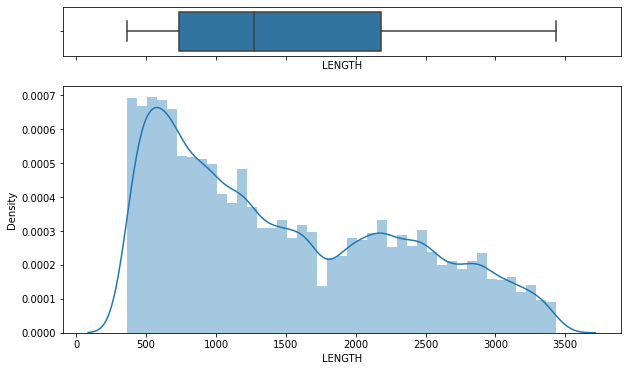

In [23]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))
sns.boxplot(data['LENGTH'], ax=ax_box)
sns.distplot(data['LENGTH'], ax=ax_hist)
plt.show()

### Coeficient ( Avg_Discount )

In [24]:
data['avg_discount'].describe()

count    62299.000000
mean         0.721861
std          0.185031
min          0.000000
25%          0.612698
50%          0.712000
75%          0.809140
max          1.500000
Name: avg_discount, dtype: float64

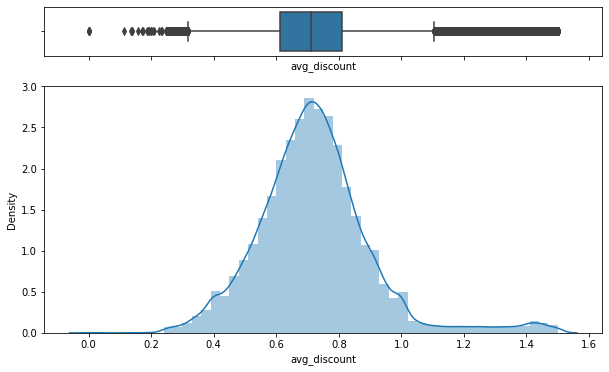

In [25]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)},figsize=(10,6))
sns.boxplot(data['avg_discount'], ax=ax_box)
sns.distplot(data['avg_discount'], ax=ax_hist)
plt.show()

In [26]:
index1=data['SUM_YR_1'] !=0
index2=data['SUM_YR_2'] !=0
index3=(data['SEG_KM_SUM'] ==0)*(data['avg_discount']==0)

In [27]:
data=data[index1|index2|index3]

In [28]:
print(data.shape)

(62044, 24)


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62044 entries, 0 to 7978
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62044 non-null  int64         
 1   FFP_DATE           62044 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62044 non-null  object        
 3   GENDER             62041 non-null  object        
 4   FFP_TIER           62044 non-null  int64         
 5   WORK_CITY          59791 non-null  object        
 6   WORK_PROVINCE      58831 non-null  object        
 7   WORK_COUNTRY       62018 non-null  object        
 8   AGE                61632 non-null  float64       
 9   LOAD_TIME          62044 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62044 non-null  int64         
 11  BP_SUM             62044 non-null  int64         
 12  SUM_YR_1           62044 non-null  float64       
 13  SUM_YR_2           62044 non-null  float64       
 14  SEG_KM_

## Data Preproccesing

In [30]:
data_=data.copy()

In [31]:
df_lrfmc=data[['MEMBER_NO','LENGTH','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
df_lrfmc.columns = ['MEMBER_NO','L','R','F','M','C']
df_lrfmc_drop=df_lrfmc[['L','R','F','M','C']]

In [32]:
df_lrfmc_drop.head()

,L,R,F,M,C
0,2706,1,210,580717,0.961639
1,2597,7,140,293678,1.252314
2,2615,11,135,283712,1.254676
3,2047,97,23,281336,1.090870
4,1816,5,152,309928,0.970658


In [33]:
df_lrfmc_drop.describe()

,L,R,F,M,C
count,62044.00000,62044.000000,62044.000000,62044.000000,62044.000000
mean,1488.69109,172.532703,11.971359,17321.694749,0.722180
std,847.88092,181.526164,14.110619,21052.728111,0.184833
min,365.00000,1.000000,2.000000,368.000000,0.136017
25%,735.00000,29.000000,3.000000,4874.000000,0.613085
50%,1278.00000,105.000000,7.000000,10200.000000,0.712162
75%,2182.00000,260.000000,15.000000,21522.500000,0.809293
max,3437.00000,731.000000,213.000000,580717.000000,1.500000


## - Outlier Treatment

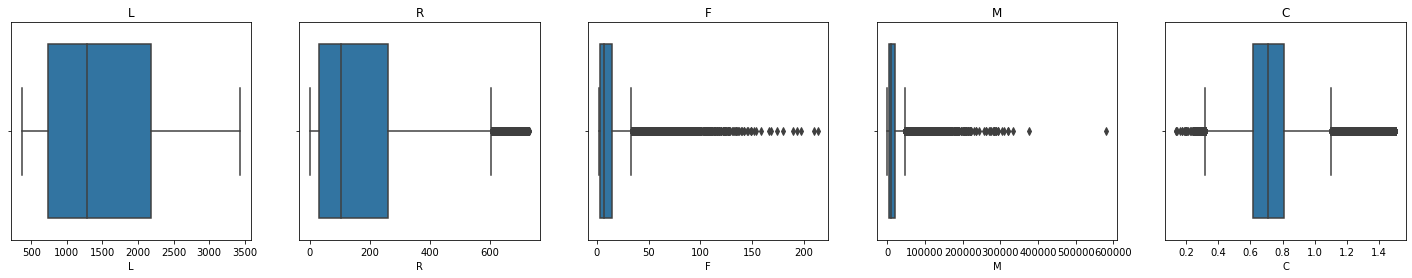

In [34]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        sns.boxplot(df_lrfmc_drop[col])
        plt.title(col)
        i = i+1     
dist_list(LRFM)

dari grafik distibusi diatas bisa disimpulkan data banyak outlier hingga distrubusi data nya negatif atau skewnes

In [35]:
rfm_log=df_lrfmc_drop.copy()

In [36]:
cols=['R','F','M','C']
for col in cols:
    high_cut = rfm_log[col].quantile(q=0.99)
    low_cut=rfm_log[col].quantile(q=0.01)
    rfm_log.loc[rfm_log[col]>high_cut,col]=high_cut
    rfm_log.loc[rfm_log[col]<low_cut,col]=low_cut

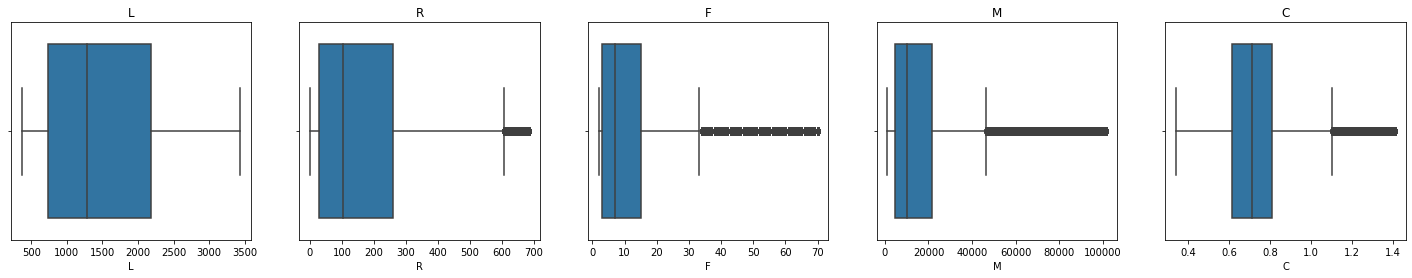

In [37]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,4])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        sns.boxplot(rfm_log[col])
        plt.title(col)
        i = i+1
        
dist_list(LRFM)

In [38]:
rfm_log.shape

(62044, 5)

<b>Scaling</b>

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
df_std=rfm_log
scale = MinMaxScaler()
kolom_all = [x for x in df_std.columns]
for kolom in kolom_all:
  df_std[kolom] = scale.fit_transform(np.array(df_std[kolom]).reshape(-1,1))

In [41]:
df_std.head()

,L,R,F,M,C
0,0.762044,0.000000,1.000000,1.0,0.581189
1,0.726562,0.008772,1.000000,1.0,0.852707
2,0.732422,0.014620,1.000000,1.0,0.854912
3,0.547526,0.140351,0.308824,1.0,0.701902
4,0.472331,0.005848,1.000000,1.0,0.589613


# Modeling

## - K MEANS

<b>Description Model</b>

K-means Clustering is one of the simplest and most popular “unsupervised machine learning algorithms”. The purpose of this algorithm is to find groups in the data, with the number of groups represented by the variable K. Variable K itself is the number of clusters we want

<b>Elbow Method to get best number for K Means</b>

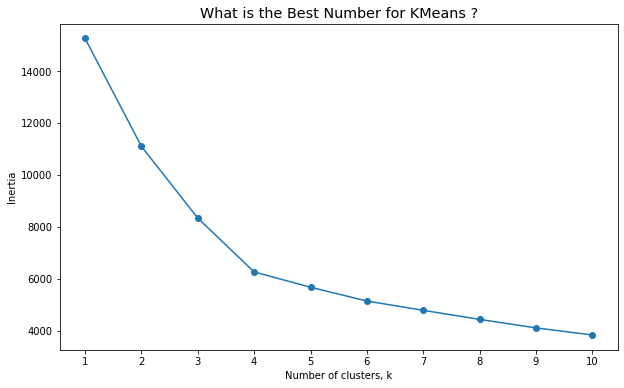

In [42]:
from sklearn.cluster import KMeans
ks = range(1,11)
inertias=[]
for k in ks :
    kc = KMeans(n_clusters=k,random_state=142)
    kc.fit(df_std)
    cluster = kc.fit_predict(df_std)
    inertias.append(kc.inertia_)
# Plot ks vs inertias
f, ax = plt.subplots(figsize=(10, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

Best Cluster = 4

<b>Silhoutte to get best number for K Means</b>

In [43]:
from sklearn.metrics import silhouette_score

In [44]:
for n_clusters in range(2,6):
    clusterer = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=300, random_state=142).fit(df_std)
    preds = clusterer.predict(df_std)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(df_std, preds, metric='mahalanobis')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.18629231504942784
For n_clusters = 3. The average silhouette_score is : 0.21459365327887003
For n_clusters = 4. The average silhouette_score is : 0.23662491231347588
For n_clusters = 5. The average silhouette_score is : 0.21187519554868625


Best Cluster = 4

<b>K-Means Model</b>

In [45]:
kc = KMeans(init='k-means++',n_clusters= 4, random_state=142)
kc.fit(df_std)
cluster_labels = kc.labels_

data_c = df_std.assign(K_Cluster = cluster_labels)
data_label=df_lrfmc.assign(K_Cluster = cluster_labels)

In [46]:
data_f=data_c.groupby('K_Cluster').mean()
data_f['count']=pd.value_counts(data_c['K_Cluster'])

In [47]:
data_f

,L,R,F,M,C,count
K_Cluster,,,,,,
0,0.503009,0.040343,0.598196,0.599804,0.418872,6046
1,0.272341,0.695674,0.029124,0.049855,0.352955,12557
2,0.686576,0.163244,0.117636,0.129998,0.364479,16924
3,0.174008,0.143275,0.110764,0.124143,0.341259,26517


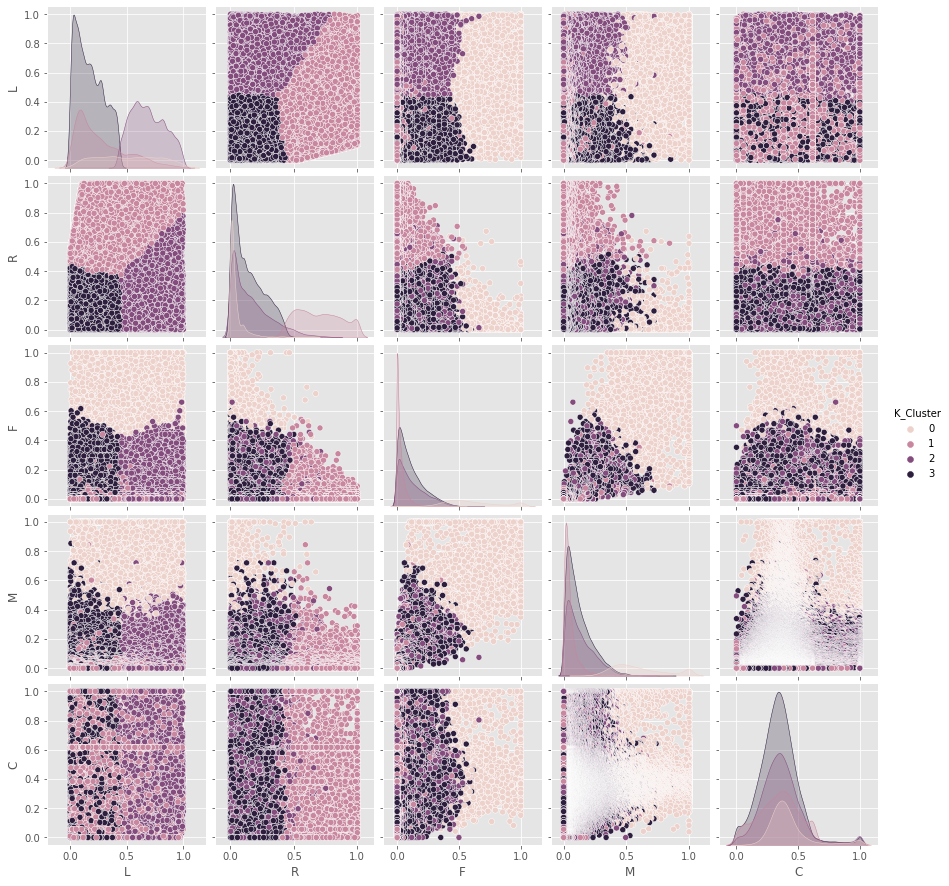

In [48]:
sns.pairplot(data=data_c, hue='K_Cluster')

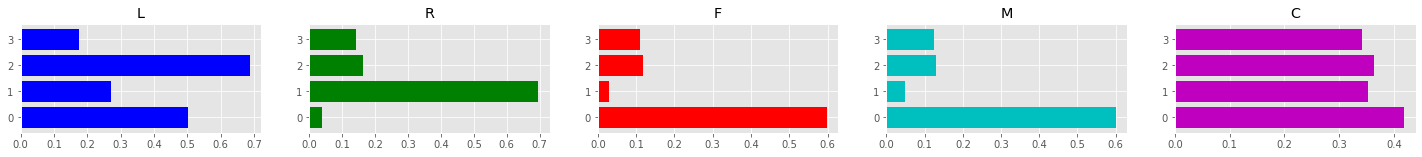

In [49]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,2])
    i = 1
    cl = ['bgrcmykw'[c] for c in range(len('bgrcmykw'))]
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        g = data_c.groupby('K_Cluster')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y,color=cl[i-1])
        plt.title(col)
        i = i+1
        
dist_list(LRFM)

<b>KMEANS</b>

0 = Loyal <br>
1 = General & Low Value<br>
2 = Important<br>
3 = Potential<br>

### - GMM (Gaussian Mixture Models)

Gaussian Mixture Model (GMM) adalah sebuah
tipe density model yang terdiri dari komponen fungsifungsi Gaussian [2]. Komponen fungsi ini terdiri dari
weight yang berbeda untuk menghasilkan multi-model
density. Pada penelitian ini GMM digunakan untuk
memodelkan warna-warna background dari tiap
piksel.
Tiap piksel memiliki GMM-nya sendiri dan data
yang diolah adalah warna piksel yang didapat dari
input. Model-model GMM terbentuk dari data warna
piksel berdasarkan waktu. Model yang terbentuk
dibagi menjadi 2 bagian, model background dan
model non-background. Model background adalah
model yang mencerminkan background.

In [50]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=142, covariance_type='full').fit(df_std)
prediction_gmm = gmm.predict(df_std)
probs = gmm.predict_proba(df_std)
data_d=df_std.assign(GMM_Cluster = prediction_gmm)
data_labelg=df_lrfmc.assign(GMM_Cluster = prediction_gmm)

In [51]:
data_g=data_d.groupby('GMM_Cluster').mean()
data_g['count']=pd.value_counts(data_d['GMM_Cluster'])

In [52]:
data_g

,L,R,F,M,C,count
GMM_Cluster,,,,,,
0,0.619637,0.138486,0.137543,0.144292,0.390618,11332
1,0.156032,0.210218,0.126526,0.142139,0.332730,14396
2,0.459299,0.049613,0.450279,0.467471,0.390131,11176
3,0.329899,0.413340,0.019808,0.033359,0.342307,25140


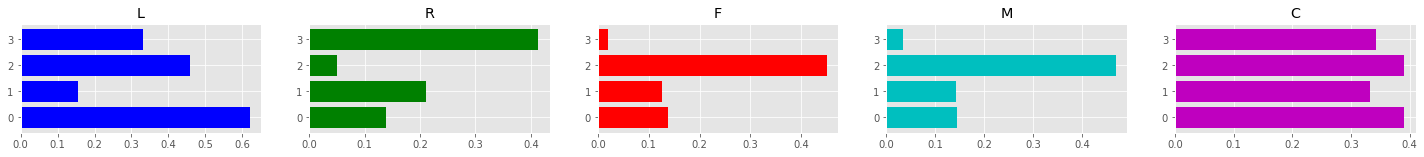

In [53]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,2])
    i = 1
    cl = ['bgrcmykw'[c] for c in range(len('bgrcmykw'))]
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        g = data_d.groupby('GMM_Cluster')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y,color=cl[i-1])
        plt.title(col)
        i = i+1
        
dist_list(LRFM)

<b>PCA</b>

In [54]:
x=data_c.drop('K_Cluster', axis=1)

CPU times: user 6.71 s, sys: 1.52 s, total: 8.23 s
Wall time: 2.31 s


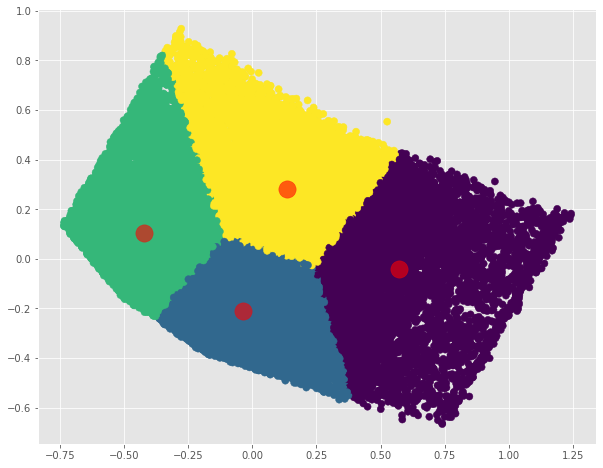

In [55]:
#kmeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
n_clusters = 4
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(df_std)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600,random_state=150, algorithm = 'auto')

%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
df_pred=data.assign(K_Cluster = prediction)
targets = [0, 1, 2,3]
plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='red', s=300, alpha=0.6);

menggunakan KMeans

In [56]:
data_labeling=data.assign(K_Cluster = cluster_labels)

In [57]:
cluster = [] #membuat list kosong
for i, k in data_labeling.iterrows(): #iterasi setiap row
    if k['K_Cluster'] == 0:
        cluster_name = 'Potential'
    elif k['K_Cluster'] == 3:
        cluster_name = 'Loyal'
    elif k['K_Cluster'] == 1:
        cluster_name = 'Important'
    else:
        cluster_name = 'Low Value'
    cluster.append(cluster_name)
    
data_labeling['cluster'] = cluster #membuat kolom dari list
data_label['cluster'] = cluster #membuat kolom dari list

In [58]:
df_me=data_label.groupby(data_label['cluster']).mean()
df_me['count']=pd.value_counts(data_label['cluster'])
df_me

,MEMBER_NO,L,R,F,M,C,K_Cluster,count
cluster,,,,,,,,
Important,31578.158477,1201.630246,477.814128,3.980409,6215.159831,0.717046,1,12557
Low Value,30466.780962,2474.162787,112.658946,9.999232,14244.722052,0.729831,2,16924
Loyal,32124.226345,899.551722,98.999962,9.531961,13658.555417,0.704615,3,26517
Potential,31340.597916,1910.243963,28.594939,44.787132,65068.123884,0.788468,0,6046


# Evaluation (Insight)

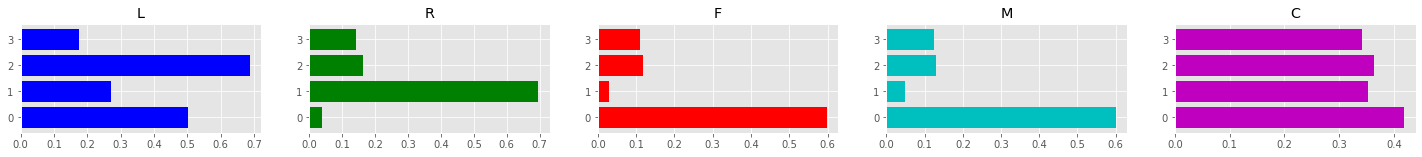

In [59]:
LRFM=['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,2])
    i = 1
    cl = ['bgrcmykw'[c] for c in range(len('bgrcmykw'))]
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        g = data_c.groupby('K_Cluster')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y,color=cl[i-1])
        plt.title(col)
        i = i+1
        
dist_list(LRFM)

<b>KMEANS</b>

0 = Loyal <br>
1 = General & Low Value<br>
2 = Important<br>
3 = Potential<br>

<b>Loyal</b> ( L) Long enough, (R) Very New, (F) High frequency, (M) Total long trip, (C) Average discount very high

<b>Potential</b> ( L) very new, (R) fairly new, (F) moderate frequency, (M) total trips moderate, (C) Average discount very high

<b>Important</b> ( L) very old, (R) fairly new, (F) moderate frequency, (M) total trips are moderate, (C) average discount is quite high

<b>General & Low Value</b> ( L) not too long ago, (R) Very long, (F) low frequency, (M) Total trips are close, (C) Average discount is quite high

### Recommendation